In [73]:
import pandas as pd

In [74]:
df = pd.read_excel("/content/SouthAfrica_Merged.xlsx")
pd.set_option('display.max_columns', None)

In [75]:
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20180401,2018,4,201804,710,ZAF,South Africa,M,Import,156,CHN,China,0,W00,World,H5,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.400,False,8,kg,0.40,False,0.40,False,0,False,NaN,50.149,50.149,0.0,0.0,1.0
1,C,M,20180401,2018,4,201804,710,ZAF,South Africa,M,Import,156,CHN,China,0,W00,World,H5,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.400,False,8,kg,0.40,False,0.40,False,0,False,NaN,50.149,50.149,0.0,0.0,1.0
2,C,M,20181001,2018,10,201810,710,ZAF,South Africa,M,Import,156,CHN,China,0,W00,World,H5,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,79.480,False,8,kg,79.48,False,79.48,False,0,False,NaN,2037.623,2037.623,0.0,0.0,1.0
3,C,M,20181001,2018,10,201810,710,ZAF,South Africa,M,Import,156,CHN,China,0,W00,World,H5,HS,True,710811,"Metals; gold, non-monetary, powder",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,10.060,False,8,kg,10.06,False,10.06,False,0,False,NaN,2000.993,2000.993,0.0,0.0,1.0
4,C,M,20181001,2018,10,201810,710,ZAF,South Africa,M,Import,156,CHN,China,0,W00,World,H5,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,69.420,False,8,kg,69.42,False,69.42,False,0,False,NaN,36.630,36.630,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,C,M,20241101,2024,11,202411,710,ZAF,South Africa,M,Import,380,ITA,Italy,0,W00,World,H6,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.064,True,-1,NaN,0.00,False,0.00,True,0,False,NaN,NaN,NaN,NaN,NaN,NaN
497,C,M,20241201,2024,12,202412,710,ZAF,South Africa,M,Import,276,DEU,Germany,0,W00,World,H6,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.030,True,-1,NaN,0.00,False,0.00,True,0,False,NaN,NaN,NaN,NaN,NaN,NaN
498,C,M,20241201,2024,12,202412,710,ZAF,South Africa,M,Import,276,DEU,Germany,0,W00,World,H6,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.030,True,-1,NaN,0.00,False,0.00,True,0,False,NaN,NaN,NaN,NaN,NaN,NaN
499,C,M,20241201,2024,12,202412,710,ZAF,South Africa,M,Import,380,ITA,Italy,0,W00,World,H6,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.073,True,-1,NaN,0.00,False,0.00,True,0,False,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# initially we have 198 rows and 47 columns
print(f"Total rows: {df.shape[0]} and Total columns {df.shape[1]}")

Total rows: 501 and Total columns 47


In [77]:
df.columns

Index(['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period',
       'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationCode',
       'classificationSearchCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty',
       'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty',
       'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt',
       'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue',
       'legacyEstimationFlag', 'isReported', 'isAggregate'],
      dtype='object')

## Data Cleaning


In [78]:
# need to be removed because we have alternative column called "reportedDes'
df.drop('reporterISO', axis=1, inplace=True)


In [79]:
# period, freqcode, refperiodid
# we have alternate column for "period" --> refyear, refmonth
# column like "freqcode" and "refPeriodId" are not in use

df.drop(['period', 'freqCode', 'refPeriodId'], axis=1, inplace=True)

In [80]:
# There is no difference in 'qtyUnitAbbr' and 'altQtyUnitAbbr' in case of null values and total number of values so removing
df.drop('altQtyUnitAbbr', axis=1, inplace=True)

In [81]:
# df[['typeCode', 'isReported', 'isAggregate', 'fobvalue']]
# df['typeCode'].isnull().sum() --0
# df['isReported'].isnull().sum() -- 66
# df['isAggregate'].isnull().sum() -- 66
# df['fobvalue'].isnull().sum() -- 66
df.drop(['typeCode', 'isReported', 'isAggregate', 'fobvalue'], axis=1, inplace=True)

In [82]:
df.drop('partnerISO', axis=1, inplace=True)

In [83]:
# This column has only value zero, so removing
df.drop('partner2Code', axis=1, inplace=True)

In [84]:
# these columns are only with respect to world so removing it
df.drop(['partner2ISO','partner2Desc'], axis=1, inplace=True)

In [85]:
df.shape

(501, 34)

## Data Visualization

In [86]:
df.head(2)

,refYear,refMonth,reporterCode,reporterDesc,flowCode,flowDesc,partnerCode,partnerDesc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,primaryValue,legacyEstimationFlag
0,2018,4,710,South Africa,M,Import,156,China,H5,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.4,False,8,0.4,False,0.4,False,0,False,NaN,50.149,0.0
1,2018,4,710,South Africa,M,Import,156,China,H5,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,0.4,False,8,0.4,False,0.4,False,0,False,NaN,50.149,0.0


In [87]:
df['netWgt'].value_counts()

,count
netWgt,
0.01,34
0.50,32
0.00,30
1.00,25
0.02,20
...,...
4.31,1
2.70,1
2.40,1


In [88]:
# southafrica gold imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

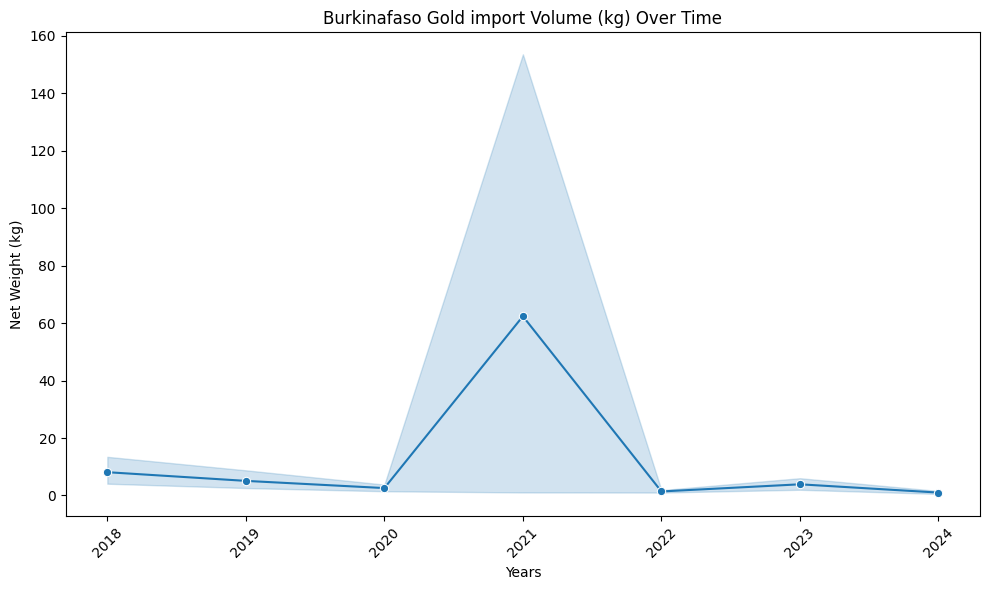

In [89]:
# Net Weight Trend, southafrica gold imports
# 1.Gold import Volume Over Time (Net Weight)
plt.figure(figsize=(10,6))
sns.lineplot(x='refYear', y='netWgt', data=df, marker='o')
plt.title('Burkinafaso Gold import Volume (kg) Over Time')
plt.xlabel('Years')
plt.ylabel('Net Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [90]:
#2. Which Gold Products Are imported Most (by Weight)
# Total net weight of gold in kgs with respect to each gold code
product_weights = df.groupby('cmdCode')['netWgt'].sum().sort_values(ascending=False)
product_weights

,netWgt
cmdCode,
7108,3182.57
710813,3076.11
710811,79.39
710812,27.07


/tmp/ipython-input-91-69135052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='refYear', y='netWgt', data=yearly_volume, palette='crest')


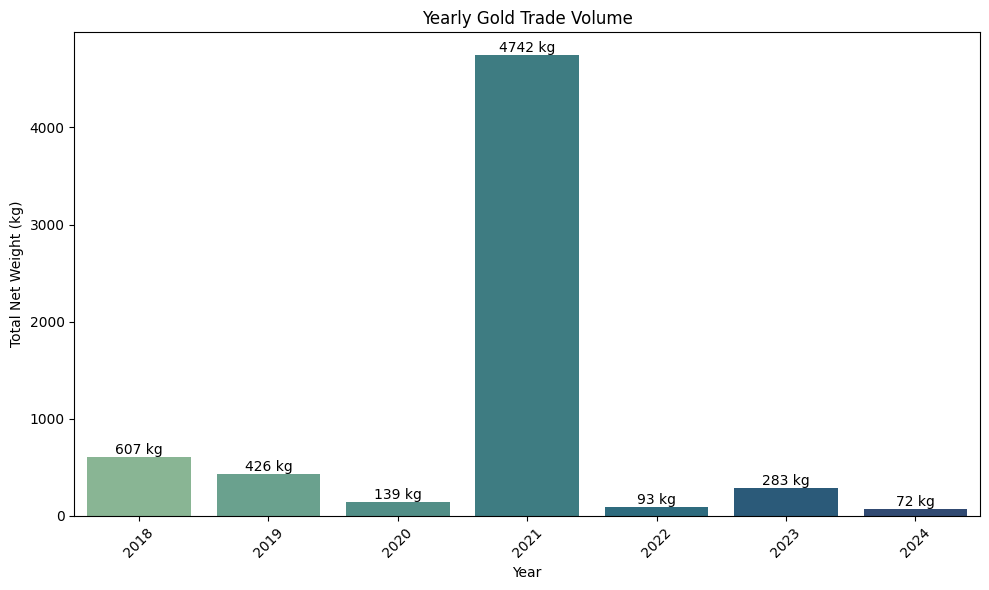

In [91]:
# Group by year and sum the net weight
yearly_volume = df.groupby('refYear')['netWgt'].sum().reset_index()
# print(yearly_volume)

plt.figure(figsize=(10,6))
sns.barplot(x='refYear', y='netWgt', data=yearly_volume, palette='crest')
plt.title('Yearly Gold Trade Volume')
plt.xlabel('Year')
plt.ylabel('Total Net Weight (kg)')
plt.xticks(rotation=45)

for i, row in yearly_volume.iterrows():
    plt.text(i, row['netWgt'], f"{int(row['netWgt'])} kg", ha='center', va='bottom', fontsize=10)
    # print(i, row)

plt.tight_layout()
plt.show()


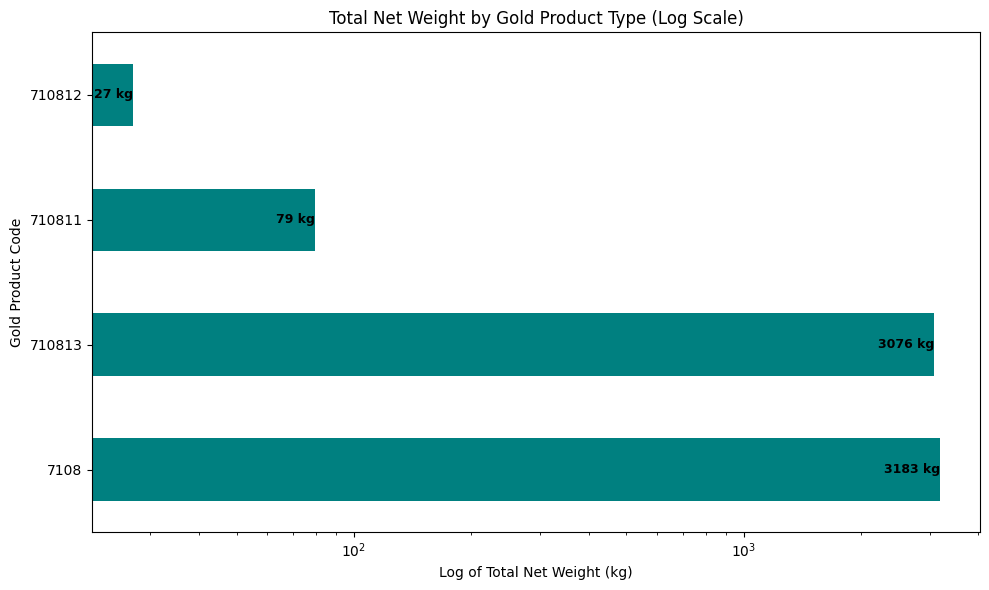

In [92]:
plt.figure(figsize=(10,6))
product_weights = df.groupby('cmdCode')['netWgt'].sum().sort_values(ascending=False)
ax = product_weights.plot(kind='barh', logx=True, color='teal')
plt.title('Total Net Weight by Gold Product Type (Log Scale)')
plt.xlabel('Log of Total Net Weight (kg)')
plt.ylabel('Gold Product Code')

for i, (index, value) in enumerate(product_weights.items()):
    ax.text(value, i, f'{value:.0f} kg', va='center', ha='right', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()





/tmp/ipython-input-93-819440657.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


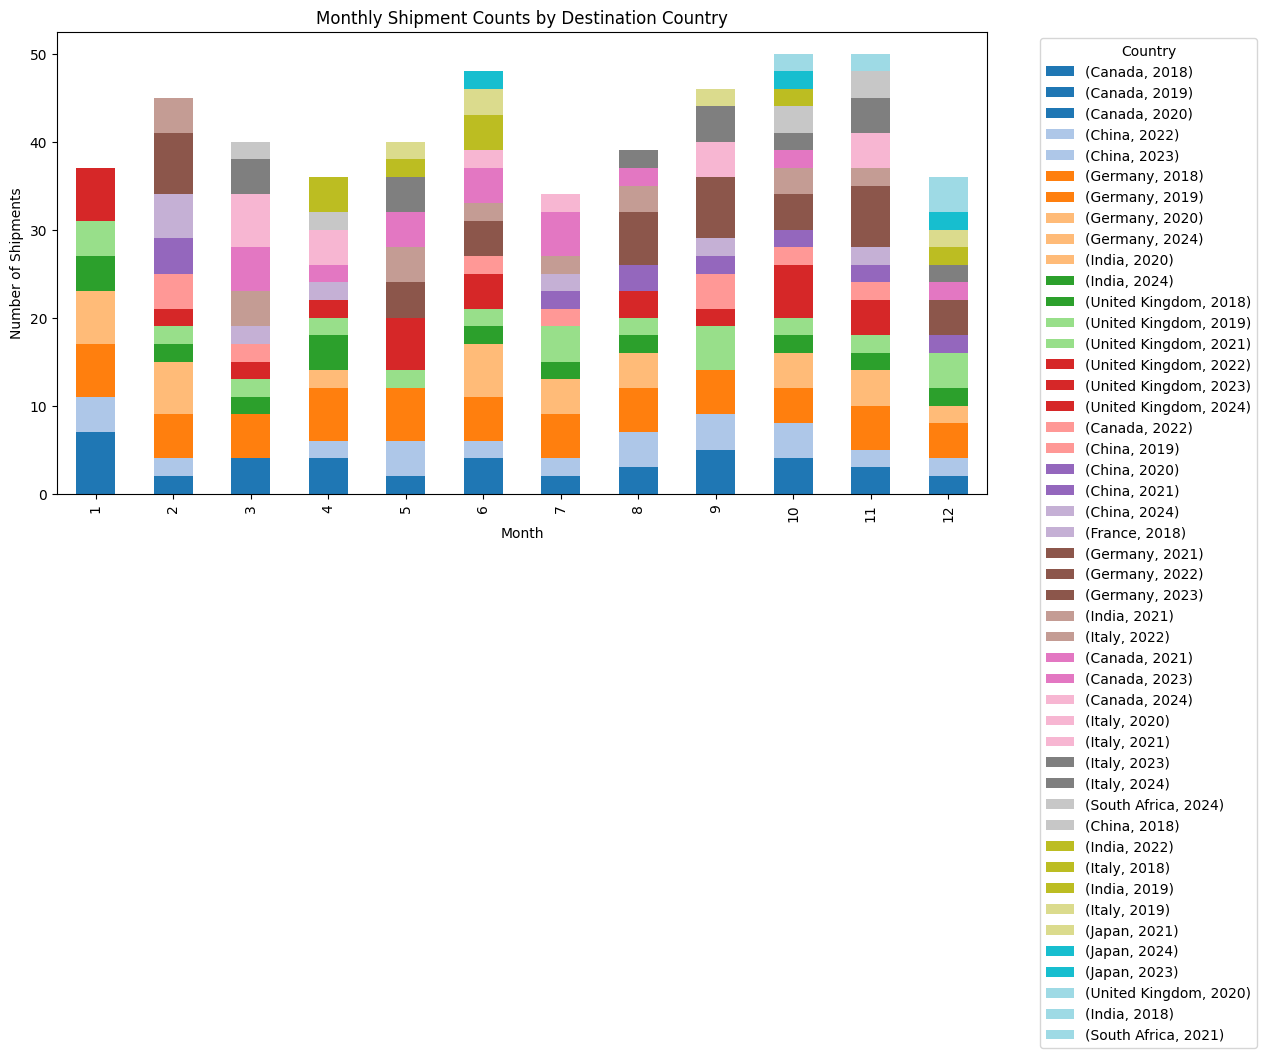

In [93]:
monthly_counts = df.groupby(['refMonth', 'partnerDesc', 'refYear']).size().reset_index(name='shipment_count')

# print(monthly_counts)

pivot = monthly_counts.pivot(index='refMonth', columns=['partnerDesc', 'refYear'], values='shipment_count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Monthly Shipment Counts by Destination Country')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
#Group and prepare the data
grouped = df.groupby(['refYear', 'partnerDesc', 'refMonth']).size().unstack(fill_value=0)

# Prepare subplot grid
years = sorted(grouped.index.get_level_values(0).unique())
n_years = len(years)
cols = 2
rows = (n_years + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), constrained_layout=True)
axes = axes.flatten()

# Define unique colormaps per year
colormaps = [
    'YlGnBu', 'OrRd', 'BuPu', 'YlOrBr', 'Greens', 'Purples', 'Reds', 'Blues'
]
# Ensure enough colormaps
while len(colormaps) < len(years):
    colormaps.extend(colormaps)

# Plot each year's heatmap
for i, year in enumerate(years):
    data = grouped.loc[year]
    all_months = list(range(1, 13))
    data = data.reindex(columns=all_months, fill_value=0)

    sns.heatmap(data,annot=True,fmt='.0f',cmap=colormaps[i],ax=axes[i],cbar=False,linewidths=0.5,linecolor='black')
    axes[i].set_title(f'Shipments by Country – {year}', fontsize=12)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Destination Country')

# Step 5: Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Title for all plots
plt.suptitle('Year-wise Monthly Gold Shipments by Country (Colored Heatmaps)', fontsize=16)
plt.show()


In [ ]:
# top three gold imports from destiations
top_countries = df.groupby('partnerDesc')['netWgt'].sum().sort_values(ascending=False).head(3)
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 3 Gold Export Destination Countries (Net Weight in kg)')
plt.xlabel('Total Net Weight (kg)')
plt.ylabel('Destination Country')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='qty', y='primaryValue', data=df)
plt.title('Correlation between Trade Quantity and Trade Value')
plt.xlabel('Trade Quantity (kg)')
plt.ylabel('Trade Value (currency)')
plt.show()

# # Calculate correlation coefficient
# corr = df['qty'].corr(df['primaryValue'])
# print(f"Correlation coefficient between qty and primaryValue: {corr:.2f}")